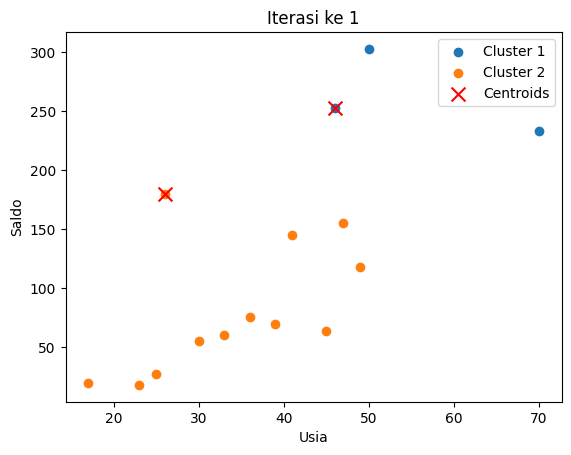

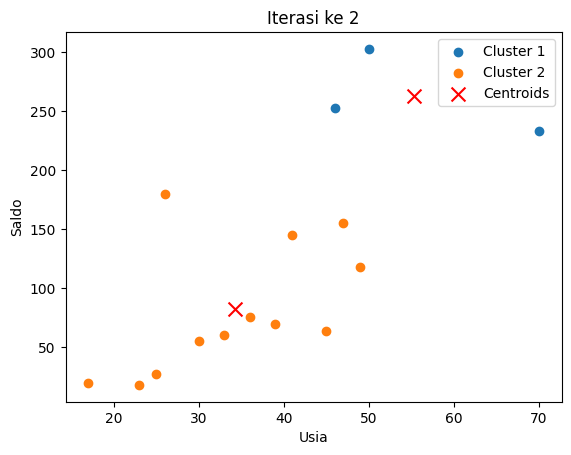

Selesai !!
Total Iterasi: 2
Waktu eksekusi: 0.22 detik


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.time()

file_path: str = "nasabah.csv"

df: pd.DataFrame = pd.read_csv(
  filepath_or_buffer=file_path,
  sep=","
)

data: np.ndarray = df[['Usia', 'Saldo']].values
initial_centoids: np.ndarray = np.array([
  [46, 253], [26, 180]
])

def manhattan_distance(a: int, b: int) -> int:
  return np.abs(a - b).sum(
    axis=1
  )

def kmeans(data: np.ndarray, k: int, max_iters: int = 100) -> np.ndarray:
  centroids: np.ndarray = initial_centoids
  
  history: list | any = []
  prev_cluster: list | any = None
  cluster: list | any = None
  
  for _ in range(max_iters):
    # Kalkulasi jarak Manhattan dan tentukan cluster
    distances: int | float | any = np.array([
      manhattan_distance(data, centroid) for centroid in centroids
    ])
    
    cluster: any = np.argmin(distances, axis=0)
    
    history.append(
      (centroids.copy(), cluster.copy())
    )
    
    # Cek apakah cluster berhenti berubah
    if np.all(prev_cluster == cluster):
      break
    
    prev_cluster = cluster.copy()
    
    # Perbarui centoids
    centroids = np.array(
      [data[cluster == i].mean(axis=0) for i in range(k)]
    )
  
  return history, cluster

# Jumlah cluster (k)
k: int = 2

history, final_cluster = kmeans(data, k, max_iters=100)

# Visualisasikan cluster pada setiap iterasi
for i, (centroids, clusters) in enumerate(history):
  plt.figure()
  plt.title(f"Iterasi ke {i + 1}")
  
  for j in range(k):
    plt.scatter(
      data[clusters == j, 0],
      data[clusters == j, 1],
      label=f"Cluster {j + 1}"
    )
  
  plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    color="red",
    s=100,
    label="Centroids"
  )
  
  plt.xlabel("Usia")
  plt.ylabel("Saldo")
  plt.legend()
  plt.show()

df['Cluster'] = final_cluster

df.to_csv(
  path_or_buf="nasabah_clustered.csv",
  index=False,
  sep=","
)
end_time = time.time()
duration = end_time - start_time

print("Selesai !!")
print("Total Iterasi:", len(history))
print(f"Waktu eksekusi: {duration:.2f} detik")
